In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [157]:
mushroom_df = pd.read_csv ('/Users/taylorgonzalez/Downloads/mushrooms.csv')

In [158]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [159]:
mushroom_df.shape

(8124, 23)

In [160]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [161]:
mushroom_df.groupby(['class', 'odor']).count()

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  ...  \
class odor                                                                ...   
e     a              400        400         400          400         400  ...   
      l              400        400         400          400         400  ...   
      n             3408       3408        3408         3408        3408  ...   
p     c              192        192         192          192         192  ...   
      f             2160       2160        2160         2160        2160  ...   
      m               36         36          36           36          36  ...   
      n              120        120         120          120         120  ...   
      p              256        256         256          256         256  ...   
      s              576        576         576          576         576  ...   
      y              576        576         576          576         576  ...   

            stalk-surface-below-ring  stalk-color-above-ring  \
class odor                                                     
e     a                          400                     400   
      l                          400                     400   
      n                         3408                    3408   
p     c                          192                     192   
      f                         2160                    2160   
      m                           36                      36   
      n                          120                     120   
      p                          256                     256   
      s                          576                     576   
      y                          576                     576   

            stalk-color-below-ring  veil-type  veil-color  ring-number  \
class odor                                                               
e     a                        400        400         400          400   
      l                        400        400         400          400   
      n                       3408       3408        3408         3408   
p     c                        192        192         192          192   
      f                       2160       2160        2160         2160   
      m                         36         36          36           36   
      n                        120        120         120          120   
      p                        256        256         256          256   
      s                        576        576         576          576   
      y                        576        576         576          576   

            ring-type  spore-print-color  population  habitat  
class odor                                                     
e     a           400                400         400      400  
      l           400                400         400      400  
      n          3408               3408        3408     3408  
p     c           192                192         192      192  
      f          2160               2160        2160     2160  
      m            36           

In [162]:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [163]:
labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [164]:
features[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [165]:
labels.replace('p', 0, inplace=True)
labels.replace('e', 0, inplace=True)
labels[0:5]

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [166]:
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [167]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [168]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [169]:
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                         keras.layers.Dense(20, activation=tf.nn.relu),
                        keras.layers.Dense(2, activation='softmax')])

In [170]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [172]:
history = model.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
163/163 [==============================] - 0s 1ms/step - loss: 0.0478 - acc: 0.9829 - val_loss: 7.1887e-04 - val_acc: 1.0000
Epoch 2/20
163/163 [==============================] - 0s 742us/step - loss: 3.8197e-04 - acc: 1.0000 - val_loss: 2.0620e-04 - val_acc: 1.0000
Epoch 3/20
163/163 [==============================] - 0s 770us/step - loss: 1.3856e-04 - acc: 1.0000 - val_loss: 9.4747e-05 - val_acc: 1.0000
Epoch 4/20
163/163 [==============================] - 0s 750us/step - loss: 7.0557e-05 - acc: 1.0000 - val_loss: 5.3708e-05 - val_acc: 1.0000
Epoch 5/20
163/163 [==============================] - 0s 727us/step - loss: 4.2294e-05 - acc: 1.0000 - val_loss: 3.4116e-05 - val_acc: 1.0000
Epoch 6/20
163/163 [==============================] - 0s 723us/step - loss: 2.7925e-05 - acc: 1.0000 - val_loss: 2.3406e-05 - val_acc: 1.0000
Epoch 7/20
163/163 [==============================] - 0s 736us/step - loss: 1.9650e-05 - acc: 1.0000 - val_loss: 1.6913e-05 - val_acc: 1.0000
Epoch 8/20
1

In [173]:
prediction_feautures = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 490us/step - loss: 1.3510e-06 - acc: 1.0000
[1.3509884411178064e-06, 1.0]


In [174]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

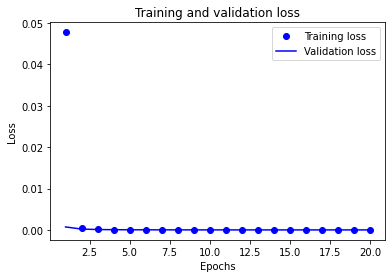

In [175]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
